In [26]:
import librosa
import librosa.display
import IPython.display as ipd
import stumpy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import math
import os
import sys
import logging
logging.basicConfig(level=logging.INFO)

In [27]:
current = os.path.dirname(os.path.realpath(sys.argv[0]))
parent = os.path.dirname(current)
sys.path.append(parent)

from MSig import Motif, NullModel

In [28]:
# Load the audio file
audio_path = '../data/audio/imblue.mp3'
ipd.Audio(audio_path)

In [29]:
#Extract MFCCs
y, sr = librosa.load(audio_path) #22050 sr
n_mfcc = 12
n_fft = int(sr * 0.046)  # 46 milliseconds STFT window
hop_length = int(sr * 0.023)  # 23 milliseconds STFT hop
X = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft, n_mels=32)
X = X.astype(np.float64)
X.shape

(12, 9533)

In [30]:
data = pd.DataFrame(X.T)
data['datetime'] = data.index * hop_length / sr
data['datetime'] = pd.to_datetime(data['datetime'], unit='s')
data = data.set_index('datetime')
data.columns = ['Coefficient ' + str(i) for i in range(n_mfcc)]
data


Coefficient 0  Coefficient 1  Coefficient 2  \
datetime                                                                     
1970-01-01 00:00:00.000000000    -364.868744       0.000000       0.000000   
1970-01-01 00:00:00.022993197    -364.868744       0.000000       0.000000   
1970-01-01 00:00:00.045986394    -364.868744       0.000000       0.000000   
1970-01-01 00:00:00.068979591    -362.019623       4.015765       3.975530   
1970-01-01 00:00:00.091972789    -359.894684       7.007147       6.925999   
...                                      ...            ...            ...   
1970-01-01 00:03:39.079183673    -344.907990      27.431713      25.202717   
1970-01-01 00:03:39.102176870    -344.375671      28.348503      26.539526   
1970-01-01 00:03:39.125170068    -346.436646      25.284151      23.172792   
1970-01-01 00:03:39.148163265    -346.960114      24.851780      23.489021   
1970-01-01 00:03:39.171156462    -278.731232      52.071812      12.290122   

                               Coefficient 3  Coefficient 4  Coefficient 5  \
datetime                                                                     
1970-01-01 00:00:00.000000000       0.000000       0.000000       0.000000   
1970-01-01 00:00:00.022993197       0.000000       0.000000       0.000000   
1970-01-01 00:00:00.045986394       0.000000       0.000000       0.000000   
1970-01-01 00:00:00.068979591       3.909195       3.817839       3.702929   
1970-01-01 00:00:00.091972789       6.792317       6.608400       6.377415   
...                                      ...            ...            ...   
1970-01-01 00:03:39.079183673      21.976593      18.326973      14.802053   
1970-01-01 00:03:39.102176870      23.807529      20.519068      17.084938   
1970-01-01 00:03:39.125170068      20.322159      17.387539      14.818312   
1970-01-01 00:03:39.148163265      21.412231      18.875328      16.166595   
1970-01-01 00:03:39.171156462      11.421745       8.277422       6.915308   

                               Coefficient 6  Coefficient 7  Coefficient 8  \
datetime                                                                     
1970-01-01 00:00:00.000000000       0.000000       0.000000       0.000000   
1970-01-01 00:00:00.022993197       0.000000       0.000000       0.000000   
1970-01-01 00:00:00.045986394       0.000000       0.000000       0.000000   
1970-01-01 00:00:00.068979591       3.566309       3.410144       3.236890   
1970-01-01 00:00:00.091972789       6.103304       5.790723       5.444933   
...                                      ...            ...            ...   
1970-01-01 00:03:39.079183673      11.791014       9.464296       7.796614   
1970-01-01 00:03:39.102176870      13.885614      11.207655       9.203783   
1970-01-01 00:03:39.125170068      12.754497      11.118019       9.792340   
1970-01-01 00:03:39.148163265      13.559221      11.268126       9.421578   
1970-01-01 00:03:39.171156462       5.396020       3.979845       3.938637   

                               Coefficient 9  Coefficient 10  Coefficient 11  
datetime                                                                      
1970-01-01 00:00:00.000000000       0.000000        0.000000        0.000000  
1970-01-01 00:00:00.022993197       0.000000        0.000000        0.000000  
1970-01-01 00:00:00.045986394       0.000000        0.000000        0.000000  
1970-01-01 00:00:00.068979591       3.049230        2.850031        2.642272  
1970-01-01 00:00:00.091972789       5.071682        4.677114        4.267604  
...                                      ...             ...             ...  
1970-01-01 00:03:39.079183673       6.646810        5.849697        5.278585  
1970-01-01 00:03:39.102176870       7.883563        7.134218        6.764168  
1970-01-01 00:03:39.125170068       8.742255        7.997646        7.546144  
1970-01-01 00:03:39.148163265       8.052261        7.107947        6.477551  
1970-01-01 00:03:39.171156462       3.

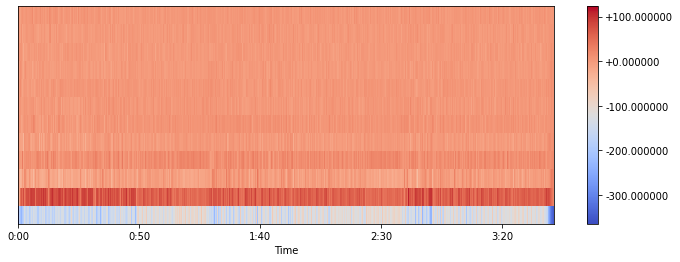

In [31]:
#Visualize MFCCs
plt.figure(figsize=(12,4))
librosa.display.specshow(X, sr=sr, x_axis='time')
plt.colorbar(format="%+2f")
plt.show()

In [32]:
from stumpy import config

config.STUMPY_EXCL_ZONE_DENOM = 2 # r = np.ceil(m/2)include = None
include = None
normalize = True
subsequence_lengths = [int(secs * sr / hop_length) for secs in [0.5,1,3,5]]

In [33]:
for m in subsequence_lengths:
    mp, mp_indices = stumpy.mstump(X, m, include=include, normalize=normalize)
    np.save('../results/audio/mp/mp_normalized={}_include={}_m={}.npy'.format(normalize,include,m), mp)
    np.save('../results/audio/mp_indices/mp_indices_normalized={}_include={}_m={}.npy'.format(normalize,include,m), mp_indices)

In [34]:
def table_summary_motifs(motif_indices, motif_distances, motif_subspaces, data, m, normalize, max_allowed_dist):
    mp_stats_table = pd.DataFrame(columns=["ID", "k", "Features", "m", "#Matches", "Indices", "max(dists)", "min(dists)", "med(dists)"])

    motif_index = 0

    n_vars, n_time = data.shape

    if normalize:
        data = (data - np.mean(data, axis=1)[:, np.newaxis]) / np.std(data, axis=1)[:, np.newaxis]
    
    model_empirical = NullModel(data, model="empirical")

    for motif_indice, match_indices in enumerate(motif_indices):

        dimensions = motif_subspaces[motif_indice]
            
        #remove filling values of -1 and Nans from motif_indices and match_distances
        match_indices = match_indices[match_indices != -1]
        match_distances = motif_distances[motif_indice]
        match_distances = match_distances[~np.isnan(match_distances)]

        #if is empty, skip
        if len(match_indices) == 0:
            continue
        
        #remove trivial matches  
        non_trivial_matches = []
        for indice in match_indices:
           trivial = False
           for indice_new in non_trivial_matches:
               if abs(indice - indice_new) <= m/2:
                   trivial = True
                   break
           if not trivial:
               non_trivial_matches.append(indice)
        match_indices = non_trivial_matches

        #  N = np.floor((n-p)/r) + 1
        r = np.ceil(m/2)
        max_possible_matches = int(np.floor((n_time-m)/r) + 1)



        #get the multidim time serie motif in the dimensions
        multivar_subsequence = data[dimensions][:,match_indices[0]:match_indices[0]+m]
    
        max_dist = np.max(match_distances)
        min_dist = np.min(match_distances[1:])
        avg_dist = np.mean(match_distances[1:])
        std_dist = np.std(match_distances[1:])
        med_dist = np.median(match_distances[1:])
        
        #D is distance profile between the motif pattern and Time serie
        if max_allowed_dist is None:
            D = np.empty((n_time-m+1, len(dimensions)))
            for i, dimension in enumerate(dimensions):
                D[:,i] = stumpy.mass(multivar_subsequence[i], data[dimension], normalize=normalize)
            D = np.mean(D, axis=1)
            max_allowed_dist = np.nanmax([np.nanmean(D) - 2.0 * np.nanstd(D), np.nanmin(D)])
            

        #data features are now the ones in the dimensions
        used_features = [f"{dimension}" for dimension in dimensions]


        #max_delta = max_allowed_dist        # (worst case) max_dist = sqrt(max_delta^2) <=> max_delta = max_dist
        max_delta = math.sqrt(max_allowed_dist**2/m)  # avg dist per element = SQRT((dist^2)/n_length)
        delta_thresholds = [max_delta]*len(data)

        
        #########SIG#########
        motif = Motif(multivar_subsequence, dimensions, delta_thresholds, len(match_indices))
        p = motif.set_pattern_probability(model_empirical, vars_indep=True)
        pvalue = motif.set_significance(max_possible_matches, n_vars, idd_correction=False) 

        stats_df = {"ID": str(motif_index), "k":len(dimensions),
                    "Features":",".join(used_features),
                        "m":m,
                    "#Matches": len(match_indices)-1,
                        "Indices":match_indices,
                        "max(dists)": np.around(max_dist,3), "min(dists)": np.around(min_dist,3),
                        "med(dists)": np.around(med_dist,3),  "P": p, "p-value": pvalue}
    
        mp_stats_table = pd.concat(
            [mp_stats_table, pd.DataFrame.from_records([stats_df])], ignore_index=True)
        
        motif_index += 1
    return mp_stats_table

In [35]:
k = None
min_neighbors = 1
cutoffs = np.inf
max_matches = 99999
average_delta = 0.3
max_dists = []
max_motifs = 99999
mp_stats_table = pd.DataFrame()
for m in subsequence_lengths:
    max_distance = math.sqrt(m)*average_delta
    max_dists.append(max_distance)

    excl_zone = int(np.ceil(m/4))
    mp= np.load('../results/audio/mp/mp_normalized={}_include={}_m={}.npy'.format(normalize,include,m))
    mp_indices = np.load('../results/audio/mp_indices/mp_indices_normalized={}_include={}_m={}.npy'.format(normalize,include,m))
    motif_distances, motif_indices, motif_subspaces, motif_mdls = stumpy.mmotifs(X, mp, mp_indices, max_distance=max_distance,max_matches=max_matches,
                                                                                 cutoffs=cutoffs, min_neighbors=min_neighbors, max_motifs=max_motifs, k=k, include=include, normalize=normalize)
    
    if len(motif_indices[0]) == 0:
        continue
       
    print("m:{}, #Motifs:{}".format(m, len(motif_indices)))  
    table = table_summary_motifs(motif_indices, motif_distances, motif_subspaces, X, m, normalize, max_distance)
    print("Sig ", np.sum(table["p-value"] < 0.01))

    #hochberg procedure
    p_values = table["p-value"].to_numpy()
    critical_value =  NullModel.hochberg_critical_value(p_values, 0.05)
    sig = table["p-value"] < critical_value if critical_value != 0 else table["p-value"] <= critical_value
    table["Sig_Hochber"] = sig

    print("Sig after Hochberg: {}, critical value: {}".format(np.sum(sig), critical_value))


    mp_stats_table = pd.concat([mp_stats_table, table], ignore_index=True)

mp_stats_table.to_csv('../results/audio/table_motifs_min_neighbors={}_max_distance={}_cutoffs={}_max_matches={}_max_motifs={}.csv'.format(min_neighbors, max_dists, cutoffs, max_matches, max_motifs), index=False)

m:21, #Motifs:220


INFO:root:p_value = 2.541E-14 (p_pattern = 2.608E-10)
INFO:root:p_value = 1.274E-24 (p_pattern = 2.280E-11)
INFO:root:p_value = 8.452E-55 (p_pattern = 7.772E-17)
INFO:root:p_value = 2.170E-66 (p_pattern = 6.125E-09)
INFO:root:p_value = 4.275E-44 (p_pattern = 3.382E-25)
INFO:root:p_value = 2.960E-31 (p_pattern = 8.901E-19)
INFO:root:p_value = 4.302E-18 (p_pattern = 3.393E-12)
INFO:root:p_value = 6.263E-43 (p_pattern = 3.668E-09)
INFO:root:p_value = 5.387E-139 (p_pattern = 9.362E-13)
INFO:root:p_value = 3.028E-154 (p_pattern = 8.629E-09)
INFO:root:p_value = 1.766E-79 (p_pattern = 3.955E-10)
INFO:root:p_value = 7.274E-56 (p_pattern = 4.412E-31)
INFO:root:p_value = 8.113E-38 (p_pattern = 4.659E-22)
INFO:root:p_value = 5.107E-47 (p_pattern = 1.169E-26)
INFO:root:p_value = 3.381E-77 (p_pattern = 2.429E-08)
INFO:root:p_value = 3.058E-11 (p_pattern = 9.046E-09)
INFO:root:p_value = 2.601E-68 (p_pattern = 2.337E-07)
INFO:root:p_value = 5.773E-32 (p_pattern = 8.128E-14)
INFO:root:p_value = 7.944E

INFO:root:p_value = 3.583E-21 (p_pattern = 3.218E-10)
INFO:root:p_value = 2.540E-24 (p_pattern = 4.055E-07)
INFO:root:p_value = 3.015E-28 (p_pattern = 1.410E-12)
INFO:root:p_value = 4.660E-31 (p_pattern = 1.821E-07)
INFO:root:p_value = 1.525E-35 (p_pattern = 5.215E-15)
INFO:root:p_value = 1.452E-85 (p_pattern = 3.953E-08)
INFO:root:p_value = 1.384E-31 (p_pattern = 4.944E-11)
INFO:root:p_value = 9.147E-37 (p_pattern = 1.565E-21)
INFO:root:p_value = 7.660E-78 (p_pattern = 7.717E-09)
INFO:root:p_value = 6.354E-80 (p_pattern = 1.838E-07)
INFO:root:p_value = 3.362E-14 (p_pattern = 6.788E-08)
INFO:root:p_value = 1.695E-48 (p_pattern = 6.430E-07)
INFO:root:p_value = 1.154E-25 (p_pattern = 5.558E-16)
INFO:root:p_value = 1.780E-58 (p_pattern = 3.210E-08)
INFO:root:p_value = 1.100E-25 (p_pattern = 1.476E-09)
INFO:root:p_value = 6.391E-37 (p_pattern = 2.647E-08)
INFO:root:p_value = 3.695E-26 (p_pattern = 9.125E-07)
INFO:root:p_value = 5.611E-16 (p_pattern = 1.735E-08)
INFO:root:p_value = 2.056E-0

Sig  220
Sig after Hochberg: 219, critical value: 4.656215670075646e-07
m:43, #Motifs:77


INFO:root:p_value = 5.099E-133 (p_pattern = 2.340E-69)
INFO:root:p_value = 8.560E-88 (p_pattern = 9.589E-47)
INFO:root:p_value = 2.262E-32 (p_pattern = 4.930E-19)
INFO:root:p_value = 4.699E-37 (p_pattern = 2.247E-21)
INFO:root:p_value = 1.729E-231 (p_pattern = 1.363E-118)
INFO:root:p_value = 2.416E-37 (p_pattern = 1.611E-21)
INFO:root:p_value = 7.696E-58 (p_pattern = 3.864E-22)
INFO:root:p_value = 1.816E-42 (p_pattern = 4.417E-24)
INFO:root:p_value = 1.425E-34 (p_pattern = 3.913E-20)
INFO:root:p_value = 6.008E-43 (p_pattern = 3.558E-17)
INFO:root:p_value = 4.361E-35 (p_pattern = 1.484E-14)
INFO:root:p_value = 5.400E-31 (p_pattern = 2.408E-18)
INFO:root:p_value = 3.203E-34 (p_pattern = 2.885E-14)
INFO:root:p_value = 7.336E-28 (p_pattern = 8.461E-10)
INFO:root:p_value = 8.923E-29 (p_pattern = 3.096E-17)
INFO:root:p_value = 1.899E-90 (p_pattern = 1.200E-15)
INFO:root:p_value = 5.492E-49 (p_pattern = 4.426E-15)
INFO:root:p_value = 7.282E-104 (p_pattern = 1.126E-15)
INFO:root:p_value = 1.39

Sig  77
Sig after Hochberg: 76, critical value: 8.54872326946644e-22
m:130, #Motifs:17


INFO:root:p_value = 0.000E+00 (p_pattern = 7.240E-275)
INFO:root:p_value = 3.901E-266 (p_pattern = 1.933E-135)
INFO:root:p_value = 1.735E-90 (p_pattern = 1.289E-47)
INFO:root:p_value = 8.430E-233 (p_pattern = 8.986E-119)
INFO:root:p_value = 0.000E+00 (p_pattern = 1.537E-226)
INFO:root:p_value = 1.010E-270 (p_pattern = 9.837E-138)
INFO:root:p_value = 6.186E-165 (p_pattern = 1.368E-43)
INFO:root:p_value = 5.739E-114 (p_pattern = 2.259E-40)
INFO:root:p_value = 2.591E-117 (p_pattern = 1.733E-41)
INFO:root:p_value = 4.229E-85 (p_pattern = 6.365E-45)
INFO:root:p_value = 7.556E-241 (p_pattern = 2.005E-42)
INFO:root:p_value = 5.733E-167 (p_pattern = 4.244E-44)
INFO:root:p_value = 1.905E-117 (p_pattern = 1.564E-41)
INFO:root:p_value = 1.271E-160 (p_pattern = 1.638E-42)
INFO:root:p_value = 1.100E-125 (p_pattern = 2.807E-44)
INFO:root:p_value = 1.975E-161 (p_pattern = 1.028E-42)
INFO:root:p_value = 7.458E-122 (p_pattern = 5.312E-43)


Sig  17
Sig after Hochberg: 16, critical value: 4.2290979006892277e-85
m:217, #Motifs:8


INFO:root:p_value = 2.467E-147 (p_pattern = 8.216E-76)
INFO:root:p_value = 0.000E+00 (p_pattern = 1.920E-182)
INFO:root:p_value = 1.350E-218 (p_pattern = 5.090E-75)
INFO:root:p_value = 1.149E-215 (p_pattern = 4.824E-74)
INFO:root:p_value = 1.868E-203 (p_pattern = 5.673E-70)
INFO:root:p_value = 0.000E+00 (p_pattern = 3.594E-69)
INFO:root:p_value = 5.817E-200 (p_pattern = 8.283E-69)


Sig  8
Sig after Hochberg: 7, critical value: 2.4671556241271143e-147


In [36]:
#create a new table for each motif length with statistics of the motifs
mp_stats_table = pd.read_csv('../results/audio/table_motifs_min_neighbors={}_max_distance={}_cutoffs={}_max_matches={}_max_motifs={}.csv'.format(min_neighbors, max_dists, cutoffs, max_matches, max_motifs))

subsequence_lengths = mp_stats_table["m"].unique()
motif_stats_table = pd.DataFrame(columns=["m", "#motifs" , "avg_n_matches", "avg_n_features",  "median_probability",  "median_pvalue", "#sig_motifs(<0.01)", "significant", "#sig_hochberg"])
for m in subsequence_lengths:
    table = mp_stats_table[mp_stats_table["m"] == m]
    n_motifs = table.shape[0]
    n_sig_motifs_001 = table[table["p-value"] < 0.01].shape[0]
    n_sig_motifs_hochberg = table[table["Sig_Hochber"] == True].shape[0]
    avg_n_matches = round(table["#Matches"].mean(),2), round(table["#Matches"].std(),3)
    avg_n_features = round(table["k"].mean(),2), round(table["k"].std(),3)
    avg_probability = table["P"].median()    
    avg_pvalue = table["p-value"].median()

    stats_df = {"m": m, "#motifs": n_motifs, "#sig_motifs(<0.01)": n_sig_motifs_001, "significant":(n_sig_motifs_001*100)/n_motifs,"#sig_hochberg": n_sig_motifs_hochberg,
                "avg_n_matches": avg_n_matches, "avg_n_features": avg_n_features, "median_probability": avg_probability, "median_pvalue": avg_pvalue}
    motif_stats_table = pd.concat([motif_stats_table, pd.DataFrame.from_records([stats_df])], ignore_index=True)

motif_stats_table

m #motifs  avg_n_matches avg_n_features  median_probability  \
0   21     220  (3.83, 4.827)   (1.04, 0.22)        1.033929e-09   
1   43      77   (2.32, 1.97)   (1.1, 0.528)        8.116752e-16   
2  130      17   (2.0, 1.118)  (1.53, 1.007)        4.244337e-44   
3  217       8  (1.88, 0.991)   (1.5, 1.069)        2.666703e-74   

   median_pvalue #sig_motifs(<0.01)  significant #sig_hochberg  
0   3.263603e-24                220        100.0           219  
1   2.248925e-41                 77        100.0            76  
2  1.975236e-161                 17        100.0            16  
3  5.752500e-216                  8        100.0             7

In [37]:
motif_stats_table_print = motif_stats_table.copy()
motif_stats_table_print["avg_n_matches"] = motif_stats_table["avg_n_matches"].apply(lambda x: "{:.2f} +- {:.2f}".format(x[0], x[1]))
motif_stats_table_print["avg_n_features"] = motif_stats_table["avg_n_features"].apply(lambda x: "{:.2f} +- {:.2f}".format(x[0], x[1]))
motif_stats_table_print["median_probability"] = motif_stats_table["median_probability"].apply(lambda x: "{:.2e}".format(x))
motif_stats_table_print["median_pvalue"] = motif_stats_table["median_pvalue"].apply(lambda x: "{:.2e}".format(x))
print(motif_stats_table_print.to_latex(index=False))

/tmp/ipykernel_26987/2250515240.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(motif_stats_table_print.to_latex(index=False))


\begin{tabular}{lllllllrl}
\toprule
  m & \#motifs & avg\_n\_matches & avg\_n\_features & median\_probability & median\_pvalue & \#sig\_motifs(<0.01) &  significant & \#sig\_hochberg \\
\midrule
 21 &     220 &  3.83 +- 4.83 &   1.04 +- 0.22 &           1.03e-09 &      3.26e-24 &                220 &        100.0 &           219 \\
 43 &      77 &  2.32 +- 1.97 &   1.10 +- 0.53 &           8.12e-16 &      2.25e-41 &                 77 &        100.0 &            76 \\
130 &      17 &  2.00 +- 1.12 &   1.53 +- 1.01 &           4.24e-44 &     1.98e-161 &                 17 &        100.0 &            16 \\
217 &       8 &  1.88 +- 0.99 &   1.50 +- 1.07 &           2.67e-74 &     5.75e-216 &                  8 &        100.0 &             7 \\
\bottomrule
\end{tabular}



In [38]:
#sort by p-value
mp_stats_table = mp_stats_table.sort_values(by="p-value", ascending=True)
mp_stats_table

ID  k Features    m  #Matches                         Indices  \
320    6  1        0  217         4  [5616, 8878, 2191, 2354, 5779]   
297    0  4  0,2,3,1  130         1                    [4583, 7845]   
301    4  4  0,2,1,3  130         1                    [4868, 8130]   
314    0  4  0,2,1,3  217         1                    [4606, 7868]   
316    2  2      0,1  217         1                    [5382, 8644]   
..   ... ..      ...  ...       ...                             ...   
119  119  1        1   21         1                     [122, 6971]   
76    76  1        0   21         1                    [3305, 6730]   
203  203  1        0   21         1                    [6409, 6470]   
187  187  1        0   21         1                    [2790, 3615]   
201  201  1        0   21         1                     [7392, 113]   

     max(dists)  min(dists)  med(dists)              P       p-value  \
320       4.392       2.944       4.173   3.594250e-69  0.000000e+00   
297       2.297       2.297       2.297  7.239531e-275  0.000000e+00   
301       2.891       2.891       2.891  1.537177e-226  0.000000e+00   
314       3.282       3.282       3.282   0.000000e+00  0.000000e+00   
316       2.880       2.880       2.880  1.919939e-182  0.000000e+00   
..          ...         ...         ...            ...           ...   
119       1.062       1.062       1.062   2.105911e-07  1.657018e-08   
76        0.861       0.861       0.861   2.345544e-07  2.055552e-08   
203       1.333       1.333       1.333   3.726103e-07  5.187001e-08   
187       1.263       1.263       1.263   5.189532e-07  1.006066e-07   
201       1.320       1.320       1.320   1.116622e-06  4.656216e-07   

     Sig_Hochber  
320         True  
297         True  
301         True  
314         True  
316         True  
..           ...  
119         True  
76          True  
203         True  
187         True  
201        False  

[322 rows x 12 columns]

In [39]:
#get top 5 most significant for each motif length
for m in subsequence_lengths:
    top_5_motifs = mp_stats_table[mp_stats_table["m"] == m].head(5)
    print(top_5_motifs.to_latex(index=False, columns=["ID", "k", "Features", "#Matches", "max(dists)", "min(dists)", "med(dists)", "P", "p-value"]))
    print("\n\n")

\begin{tabular}{rrlrrrrrr}
\toprule
 ID &  k & Features &  \#Matches &  max(dists) &  min(dists) &  med(dists) &            P &       p-value \\
\midrule
 31 &  1 &        0 &        31 &       1.368 &       0.579 &       1.092 & 1.115381e-07 & 6.756844e-165 \\
  9 &  1 &        0 &        24 &       1.374 &       0.395 &       1.147 & 8.628517e-09 & 3.027563e-154 \\
 20 &  1 &        0 &        23 &       1.348 &       0.507 &       1.069 & 1.069808e-08 & 1.816236e-145 \\
  8 &  1 &        0 &        13 &       1.373 &       0.389 &       1.183 & 9.362408e-13 & 5.386599e-139 \\
 24 &  1 &        0 &        13 &       1.364 &       0.521 &       1.231 & 1.331480e-12 & 7.457132e-137 \\
\bottomrule
\end{tabular}




\begin{tabular}{rrlrrrrrr}
\toprule
 ID &  k &  Features &  \#Matches &  max(dists) &  min(dists) &  med(dists) &             P &       p-value \\
\midrule
  4 &  5 & 0,1,2,3,6 &         1 &       1.251 &       1.251 &       1.251 & 1.362720e-118 & 1.728798e-231 \\
  0 &  3 &

/tmp/ipykernel_26987/588904083.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(top_5_motifs.to_latex(index=False, columns=["ID", "k", "Features", "#Matches", "max(dists)", "min(dists)", "med(dists)", "P", "p-value"]))
/tmp/ipykernel_26987/588904083.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(top_5_motifs.to_latex(index=False, columns=["ID", "k", "Features", "#Matches", "max(dists)", "min(dists)", "med(dists)", "P", "p-value"]))
/tmp/ipykernel_26987/5

In [40]:
def plot_motif(ts_list, features,  m, motif_indexes, motif_name):

    fig, axes = plt.subplots(ncols=3, nrows=len(ts_list), figsize=(10, 3*len(ts_list)), squeeze=False)
    for i in range(0,len(ts_list)):
        ts = ts_list[i]
        #plot light grey
        axes[i,2].plot(ts, color='black', linewidth=0.5, alpha=0.5)

        colors = plt.cm.tab20(np.linspace(0, 1, len(motif_indexes)))
        axes[i,0].set_prop_cycle('color', colors)
        axes[i,1].set_prop_cycle('color', colors)
        axes[i,2].set_prop_cycle('color', colors)

        for index in motif_indexes:
            subsequence_match = ts.iloc[index:index+m]
            z_normalized_subsequence = (subsequence_match - np.mean(subsequence_match)) / np.std(subsequence_match)
            axes[i,0].plot(z_normalized_subsequence.values)
            #original motif in the next plot with the same color
            axes[i,1].plot(subsequence_match.values) 
            # highlight the motif in the original time serie
            axes[i,2].plot(subsequence_match, linewidth=2)
        
        plt.setp(axes[i,0].xaxis.get_majorticklabels(), rotation=90)
        #remove x labels and ticks except from last plot
        if i != len(ts_list)-1:
            axes[i,0].axes.get_xaxis().set_visible(False)
            axes[i,1].axes.get_xaxis().set_visible(False)
            axes[i,2].axes.get_xaxis().set_visible(False)

        plt.setp(axes[i,0].xaxis.get_majorticklabels(), rotation=90)


        #format the x axis to show the time and rotate for better reading
        axes[i,2].xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
        plt.setp(axes[i,2].xaxis.get_majorticklabels(), rotation=45)
        axes[i,0].set_ylabel(features[i], rotation=90, size='large')


    #title of the fig
    axes[0,0].set_title("Z-Normalized Subsequences")
    axes[0,1].set_title("Raw Subsequences")
    axes[0,2].set_title("Motif in TS")
    plt.tight_layout()
    plt.savefig('../results/audio/m='+str(m)+'_motif_'+str(motif_name)+".pdf",bbox_inches='tight')
  
    return None

In [41]:
def plot_motif2(ts_list, features,  m, motif_indexes, motif_name):

    fig, axes = plt.subplots(ncols=2, nrows=len(ts_list), figsize=(10, 2*len(ts_list)), squeeze=False)
    for i in range(0,len(ts_list)):
        ts = ts_list[i]
        #plot light grey
        axes[i,1].plot(ts, color='black', linewidth=0.5, alpha=0.5)

        colors = plt.cm.tab20(np.linspace(0, 1, len(motif_indexes)))
        axes[i,0].set_prop_cycle('color', colors)
        axes[i,1].set_prop_cycle('color', colors)

        for index in motif_indexes:
            subsequence_match = ts.iloc[index:index+m]
            z_normalized_subsequence = (subsequence_match - np.mean(subsequence_match)) / np.std(subsequence_match)
            #original motif in the next plot with the same color
            axes[i,0].plot(subsequence_match.values) 
            # highlight the motif in the original time serie
            axes[i,1].plot(subsequence_match, linewidth=2)
        
        plt.setp(axes[i,0].xaxis.get_majorticklabels(), rotation=90)
        #remove x labels and ticks except from last plot
        if i != len(ts_list)-1:
            axes[i,0].axes.get_xaxis().set_visible(False)
            axes[i,1].axes.get_xaxis().set_visible(False)

        #label x with i+index
        axes[i,0].set_xticks([0,50,100,150, 200])
        axes[i,0].set_xticklabels(["i","i+50","i+100","i+150","i+200"])
        plt.setp(axes[i,0].xaxis.get_majorticklabels(), rotation=90)


        #format the x axis to show the time and rotate for better reading
        axes[i,1].xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
        plt.setp(axes[i,1].xaxis.get_majorticklabels(), rotation=45)
        axes[i,0].set_ylabel(features[i], rotation=90, size='large')


    #title of the fig
    axes[0,0].set_title("Raw Subsequences")
    axes[0,1].set_title("Motif in TS")
    plt.tight_layout()
    plt.savefig('../results/audio/m='+str(m)+'_motif_'+str(motif_name)+".pdf",bbox_inches='tight')
  
    return None

Motif length:  21
start: 4660, time: 0:01:47.148299


nearest match: 7922, time: 0:03:02.152109


start: 4904, time: 0:01:52.758639


nearest match: 8166, time: 0:03:07.762449


start: 4624, time: 0:01:46.320544


nearest match: 7886, time: 0:03:01.324354


Motif length:  43
start: 4641, time: 0:01:46.711429


nearest match: 7903, time: 0:03:01.715238


start: 4666, time: 0:01:47.286259


nearest match: 7928, time: 0:03:02.290068


start: 4771, time: 0:01:49.700544


nearest match: 8033, time: 0:03:04.704354


Motif length:  130
start: 4583, time: 0:01:45.377823


nearest match: 7845, time: 0:03:00.381633


start: 4868, time: 0:01:51.930884


nearest match: 8130, time: 0:03:06.934694


start: 4726, time: 0:01:48.665850


nearest match: 7988, time: 0:03:03.669660


Motif length:  217
start: 4606, time: 0:01:45.906667


nearest match: 7868, time: 0:03:00.910476


start: 5382, time: 0:02:03.749388


nearest match: 8644, time: 0:03:18.753197


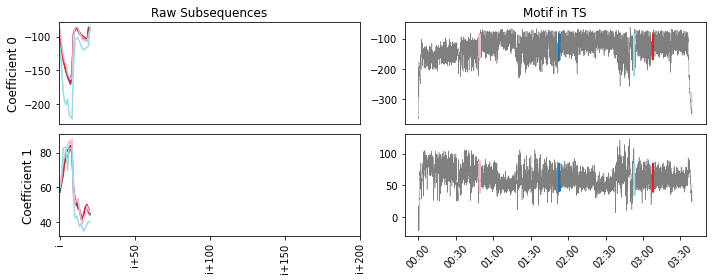

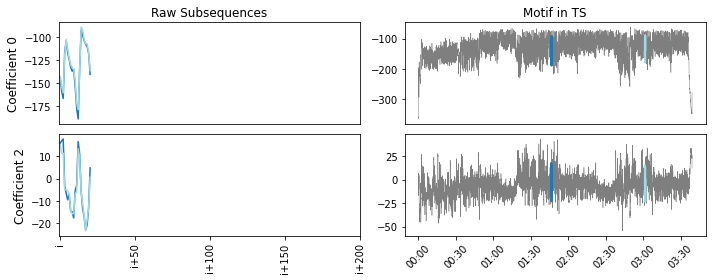

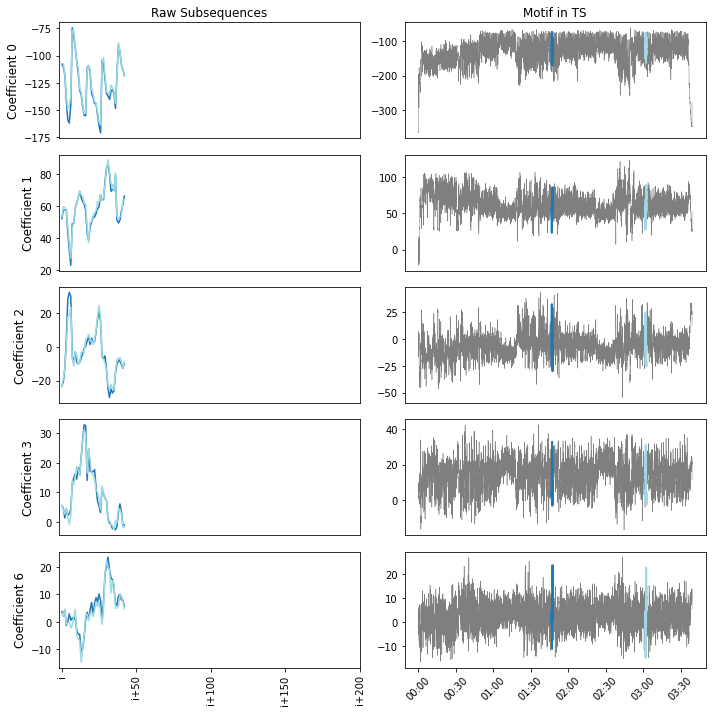

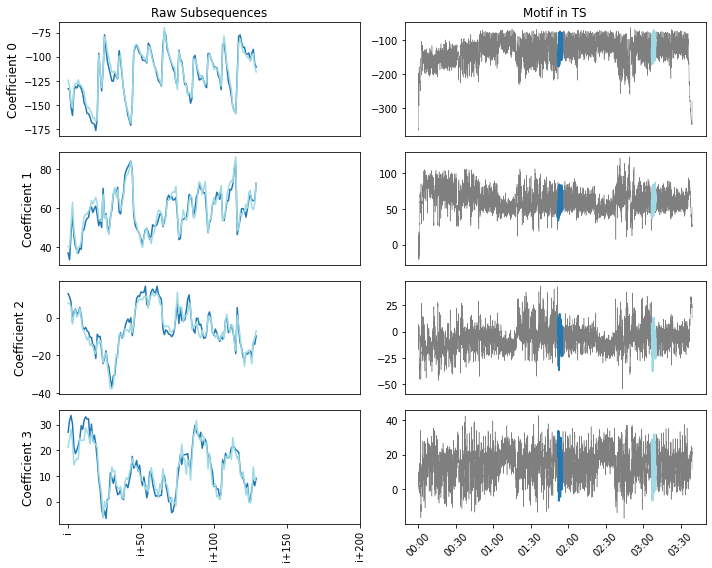

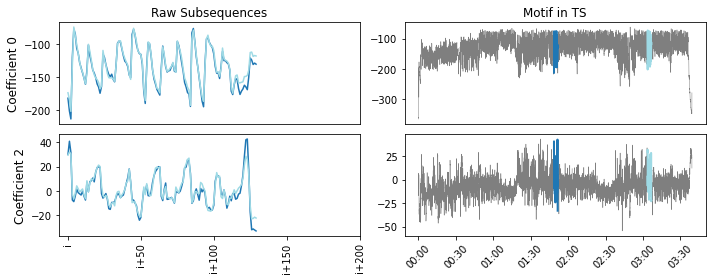

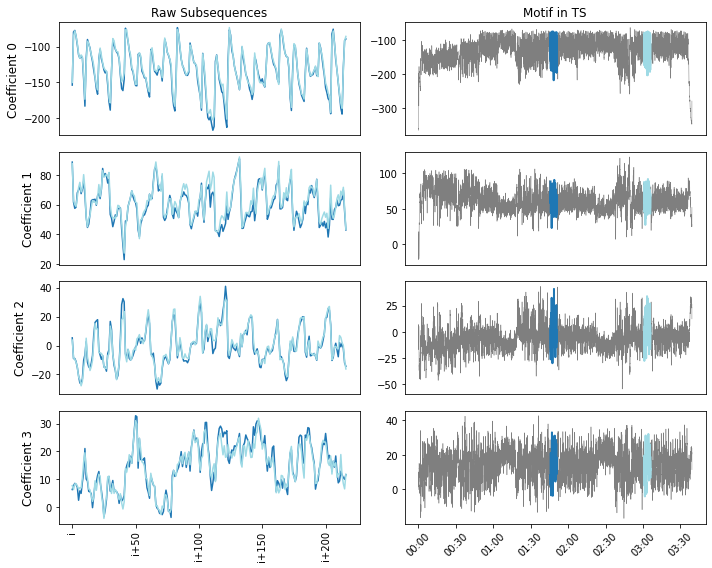

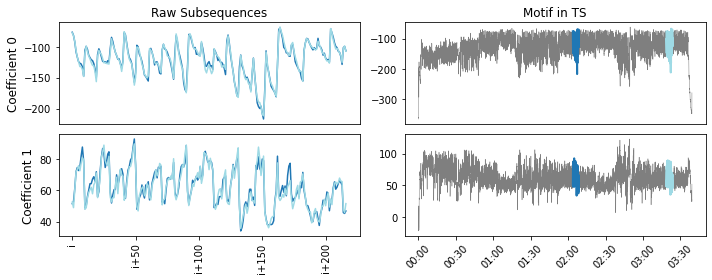

In [42]:
#plot motifs
for m in subsequence_lengths:
    print("Motif length: ", m)
    top_motifs = mp_stats_table[mp_stats_table["m"] == m]
    top_motifs = top_motifs[top_motifs["k"] > 1].sort_values(by="p-value").head(3)
    for top_motif in top_motifs.to_dict(orient="records"): 
        dimensions = top_motif["Features"].split(",")
        dimensions = sorted([int(dimension) for dimension in dimensions])
        features = [data.columns[dimension] for dimension in dimensions]
        ts_list = [data[feature] for feature in features]
        indices = top_motif['Indices'].replace("[","").replace("]","").split(",")
        indices = [int(i) for i in indices]
        motif_name = top_motif["ID"]
        segment = y[indices[0]*hop_length:(indices[0] + m)*hop_length]
        #print in seconds and datetime format
        print("start: {}, time: {}".format(indices[0], datetime.timedelta(seconds=librosa.core.frames_to_time(indices[0], sr=sr, hop_length=hop_length))))
        display(ipd.Audio(segment, rate=sr))
        #display nearest match
        segment_match = y[indices[1]*hop_length:(indices[1] + m)*hop_length]
        print("nearest match: {}, time: {}".format(indices[1], datetime.timedelta(seconds=librosa.core.frames_to_time(indices[1], sr=sr, hop_length=hop_length))))
        display(ipd.Audio(segment_match, rate=sr))

        plot_motif2(ts_list, features, m, indices, motif_name)

    
    